In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('NEWcleanedDATA.csv')
N = len(data)
X = np.zeros((N, 4))
X[:, 0] = data['u'] - data['g']
X[:, 1] = data['g'] - data['r']
X[:, 2] = data['r'] - data['i']
X[:, 3] = data['i'] - data['z']
z = data['redshift']

In [2]:
data['one'] = data['u'] - data['g']
data['two'] = data['g'] - data['r']
data['three'] = data['r'] - data['i']
data['four'] = data['i'] - data['z']

In [3]:
data

,Unnamed: 0,objid,ra,dec,u,g,r,i,z,run,...,redshift,redshift_err,plate,mjd,fiberid,class1,one,two,three,four
0,0,1.240000e+18,199.939440,32.875467,18.27449,17.01069,16.39594,16.05050,15.79158,4576,...,0.036922,0.000011,2093,53818,66,1,1.26380,0.61475,0.34544,0.25892
1,1,1.240000e+18,225.937814,61.567422,18.51085,17.42787,16.94735,16.61756,16.46231,1412,...,0.065836,0.000008,611,52055,472,1,1.08298,0.48052,0.32979,0.15525
2,2,1.240000e+18,182.372228,43.312479,19.59469,19.39359,19.08492,19.01972,19.14087,3840,...,0.960348,0.000361,1450,53120,348,0,0.20110,0.30867,0.06520,-0.12115
3,3,1.240000e+18,201.170118,7.124704,18.86066,17.91374,17.56237,17.26353,17.13068,3230,...,0.120267,0.000006,1799,53556,496,1,0.94692,0.35137,0.29884,0.13285
4,4,1.240000e+18,7.270341,-9.284358,19.46794,18.12656,17.43603,17.04602,16.81404,1740,...,0.085830,0.000014,653,52145,614,1,1.34138,0.69053,0.39001,0.23198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47479,49994,1.240000e+18,151.337996,54.438119,19.45398,17.71596,16.81220,16.35758,15.97816,2243,...,0.047551,0.000015,945,52652,134,1,1.73802,0.90376,0.45462,0.37942
47480,49995,1.240000e+18,156.323152,4.934303,17.72143,16.39257,15.74776,15.40971,15.13828,2125,...,0.028488,0.000011,576,52325,341,1,1.32886,0.64481,0.33805,0.27143
47481,49996,1.240000e+18,118.635191,28.670478,18.33770,17.17221,16.67359,16.32076,16.16934,2864,...,0.074360,0.000006,1060,52636,54,1,1.16549,0.49862,0.35283,0.15142
47482,49997,1.240000e+18,120.161569,30.098111,18.49410,16.54002,15.64546,15.21821,14.89110,2864,...,0.046291,0.000008,860,52319,350,1,1.95408,0.89456,0.42725,0.32711


In [4]:
Ntrain = 3 * N // 4
Xtrain = X[:Ntrain]
ztrain = z[:Ntrain]
Xtest = X[Ntrain:]
ztest = z[Ntrain:]

In [5]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
model =  clf.fit(Xtrain, ztrain)


In [6]:
from sklearn import tree

In [20]:
text_representation = tree.export_text(clf, feature_names = ['one','two','three','four'])
print(text_representation)

|--- one <= 0.49
|   |--- four <= 0.13
|   |   |--- one <= 0.28
|   |   |   |--- three <= 0.14
|   |   |   |   |--- four <= 0.04
|   |   |   |   |   |--- three <= -0.04
|   |   |   |   |   |   |--- three <= -0.42
|   |   |   |   |   |   |   |--- two <= 1.27
|   |   |   |   |   |   |   |   |--- two <= -0.12
|   |   |   |   |   |   |   |   |   |--- value: [0.01]
|   |   |   |   |   |   |   |   |--- two >  -0.12
|   |   |   |   |   |   |   |   |   |--- value: [0.01]
|   |   |   |   |   |   |   |--- two >  1.27
|   |   |   |   |   |   |   |   |--- value: [-0.00]
|   |   |   |   |   |   |--- three >  -0.42
|   |   |   |   |   |   |   |--- four <= -0.04
|   |   |   |   |   |   |   |   |--- one <= -0.61
|   |   |   |   |   |   |   |   |   |--- value: [0.22]
|   |   |   |   |   |   |   |   |--- one >  -0.61
|   |   |   |   |   |   |   |   |   |--- three <= -0.10
|   |   |   |   |   |   |   |   |   |   |--- four <= -0.36
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth

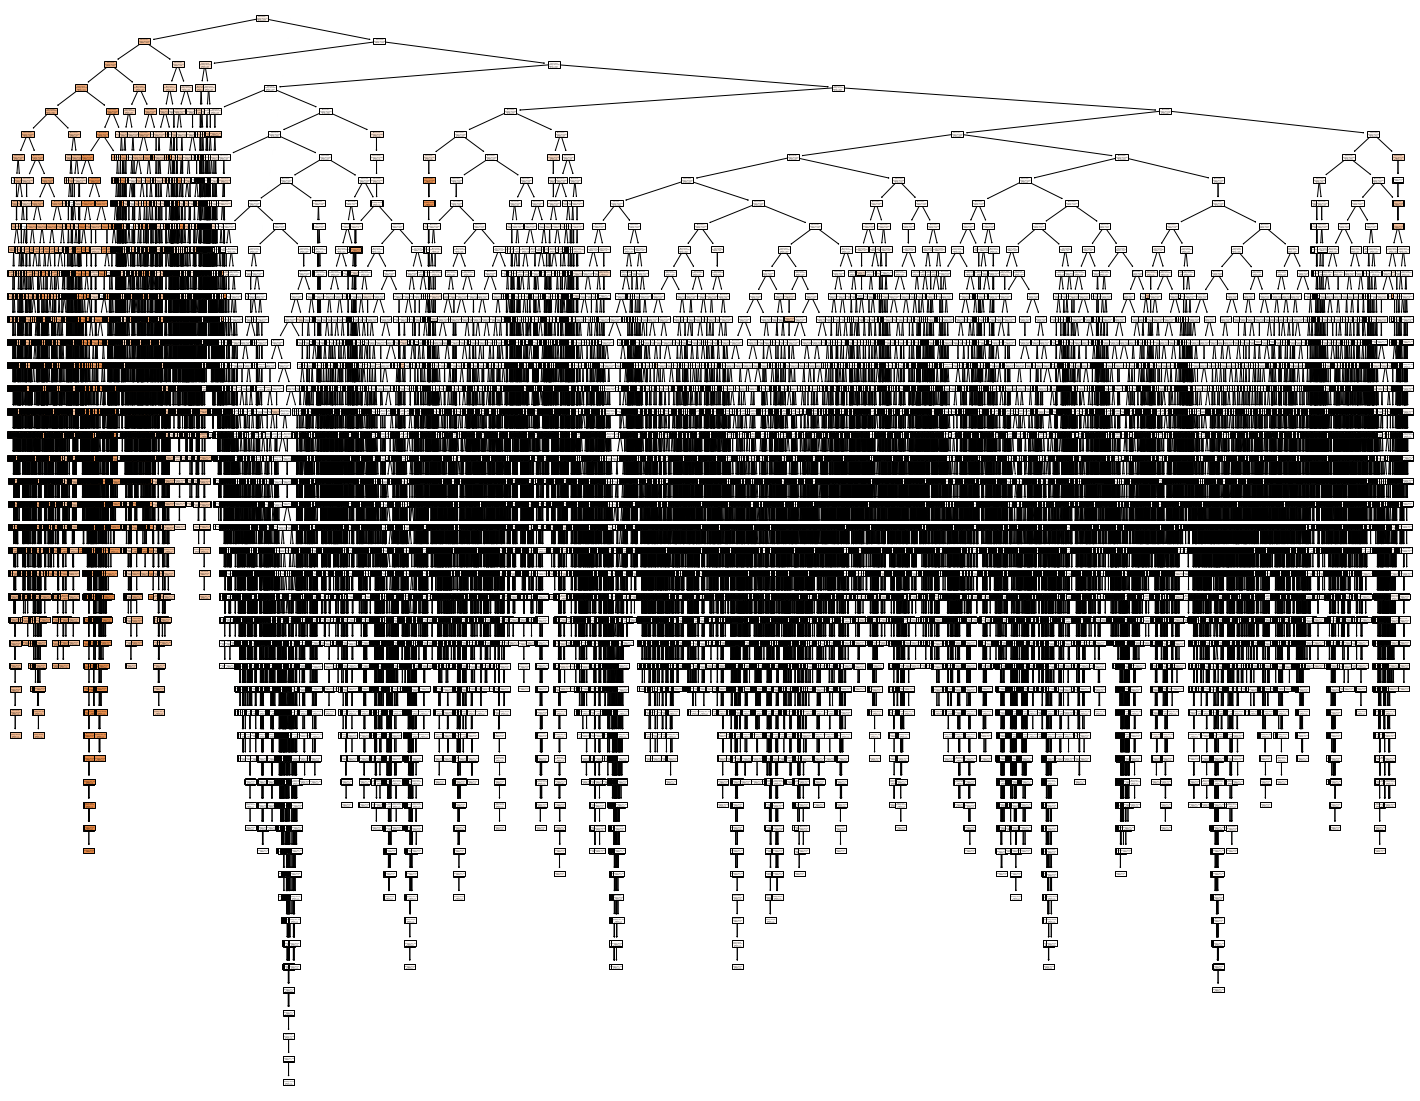

In [24]:
ig = plt.figure(figsize = ((25,20)))
_ = tree.plot_tree(clf, feature_names = ['one','two','three','four'], class_names = ['redshift'], filled = True)